# **Credit Card Fraud Detection**

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
x = df.drop('Class', axis=1)
y = df['Class']

In [10]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [11]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [14]:
print(y_train.value_counts())

Class
0    227451
1       394
Name: count, dtype: int64


In [15]:
print(y_test.value_counts())

Class
0    56864
1       98
Name: count, dtype: int64


In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [17]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(454902, 30)
(454902,)


In [18]:
print(y_train_smote.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


In [19]:
# Calculate Imbalance Ratio
original_counts = y_train.value_counts()
smote_counts = y_train_smote.value_counts()

minority_class = 1
majority_class = 0

ratio_before = original_counts[majority_class] / original_counts[minority_class]
ratio_after = smote_counts[majority_class] / smote_counts[minority_class]

print(f"--- Imbalance Ratio ---")
print(f"Ratio Before SMOTE: 1 : {ratio_before:.2f} (Majority/Minority)")
print(f"Ratio After SMOTE:  1 : {ratio_after:.2f} (Majority/Minority)")

--- Imbalance Ratio ---
Ratio Before SMOTE: 1 : 577.29 (Majority/Minority)
Ratio After SMOTE:  1 : 1.00 (Majority/Minority)


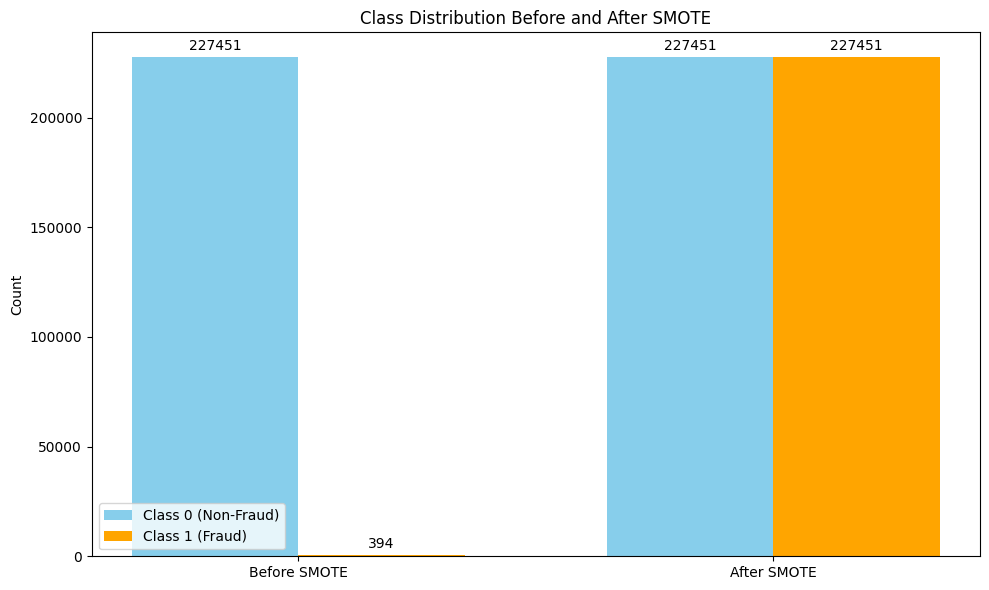

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
labels = ['Before SMOTE', 'After SMOTE']
majority_counts = [y_train.value_counts()[0], y_train_smote.value_counts()[0]]
minority_counts = [y_train.value_counts()[1], y_train_smote.value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, majority_counts, width, label='Class 0 (Non-Fraud)', color='skyblue')
rects2 = ax.bar(x + width/2, minority_counts, width, label='Class 1 (Fraud)', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

## Data Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_smote = scaler.fit_transform(x_train_smote)
x_test = scaler.transform(x_test)

In [22]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_smote, y_train_smote)

,priors,None
,var_smoothing,1e-09


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_nb = nb.predict(x_test)

print("--- Naive Bayes Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

--- Naive Bayes Results ---
Accuracy: 0.9770

Confusion Matrix:
 [[55565  1299]
 [   13    85]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



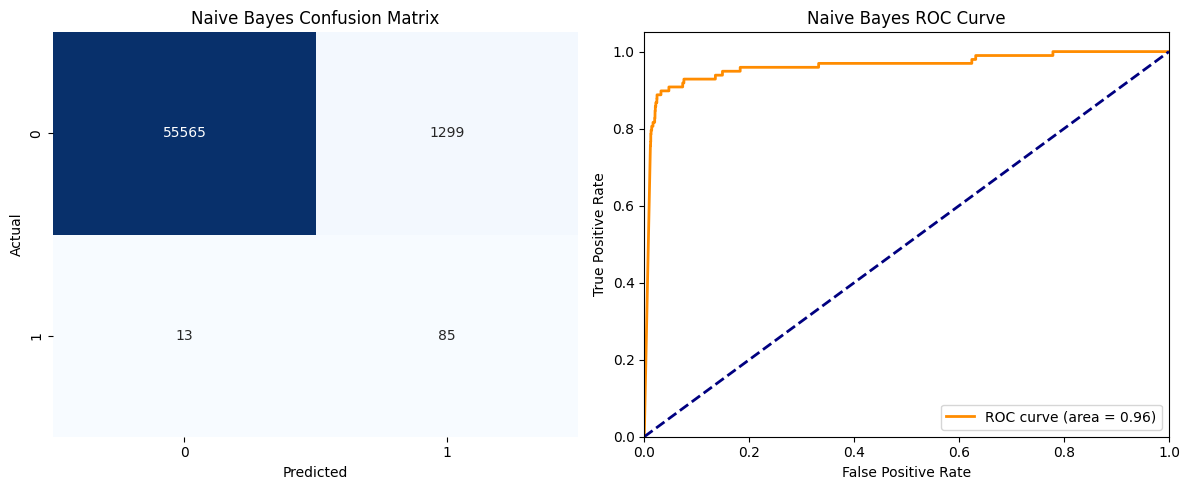

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Predictions
y_pred_nb = nb.predict(x_test)
y_prob_nb = nb.predict_proba(x_test)[:, 1]

# 2. Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [25]:
# decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smote, y_train_smote)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9806888803061691
[[55775  1089]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.89      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



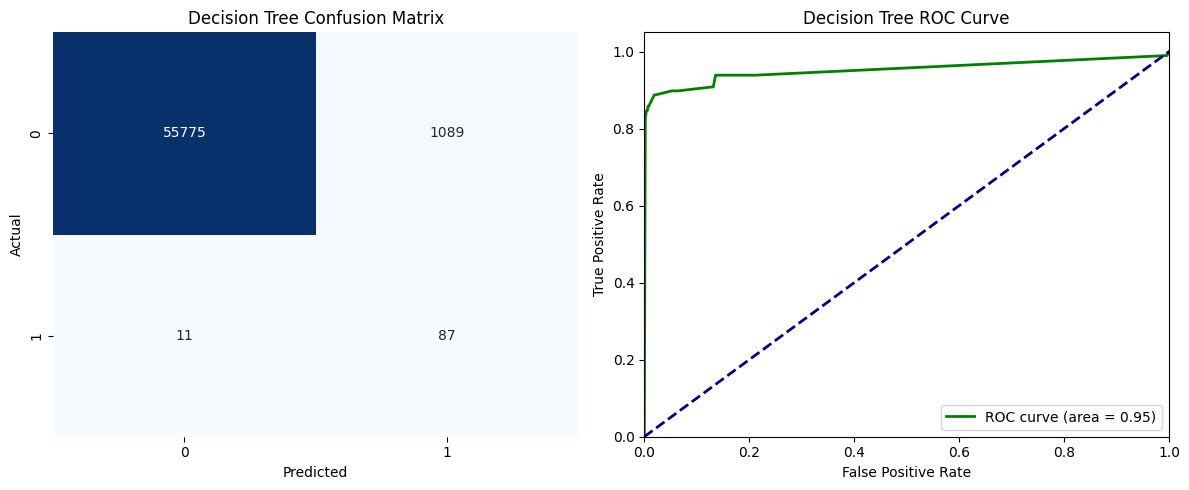

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Predictions
y_pred_dt = dt.predict(x_test)
y_prob_dt = dt.predict_proba(x_test)[:, 1]

# 2. Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.subplot(1, 2, 2)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

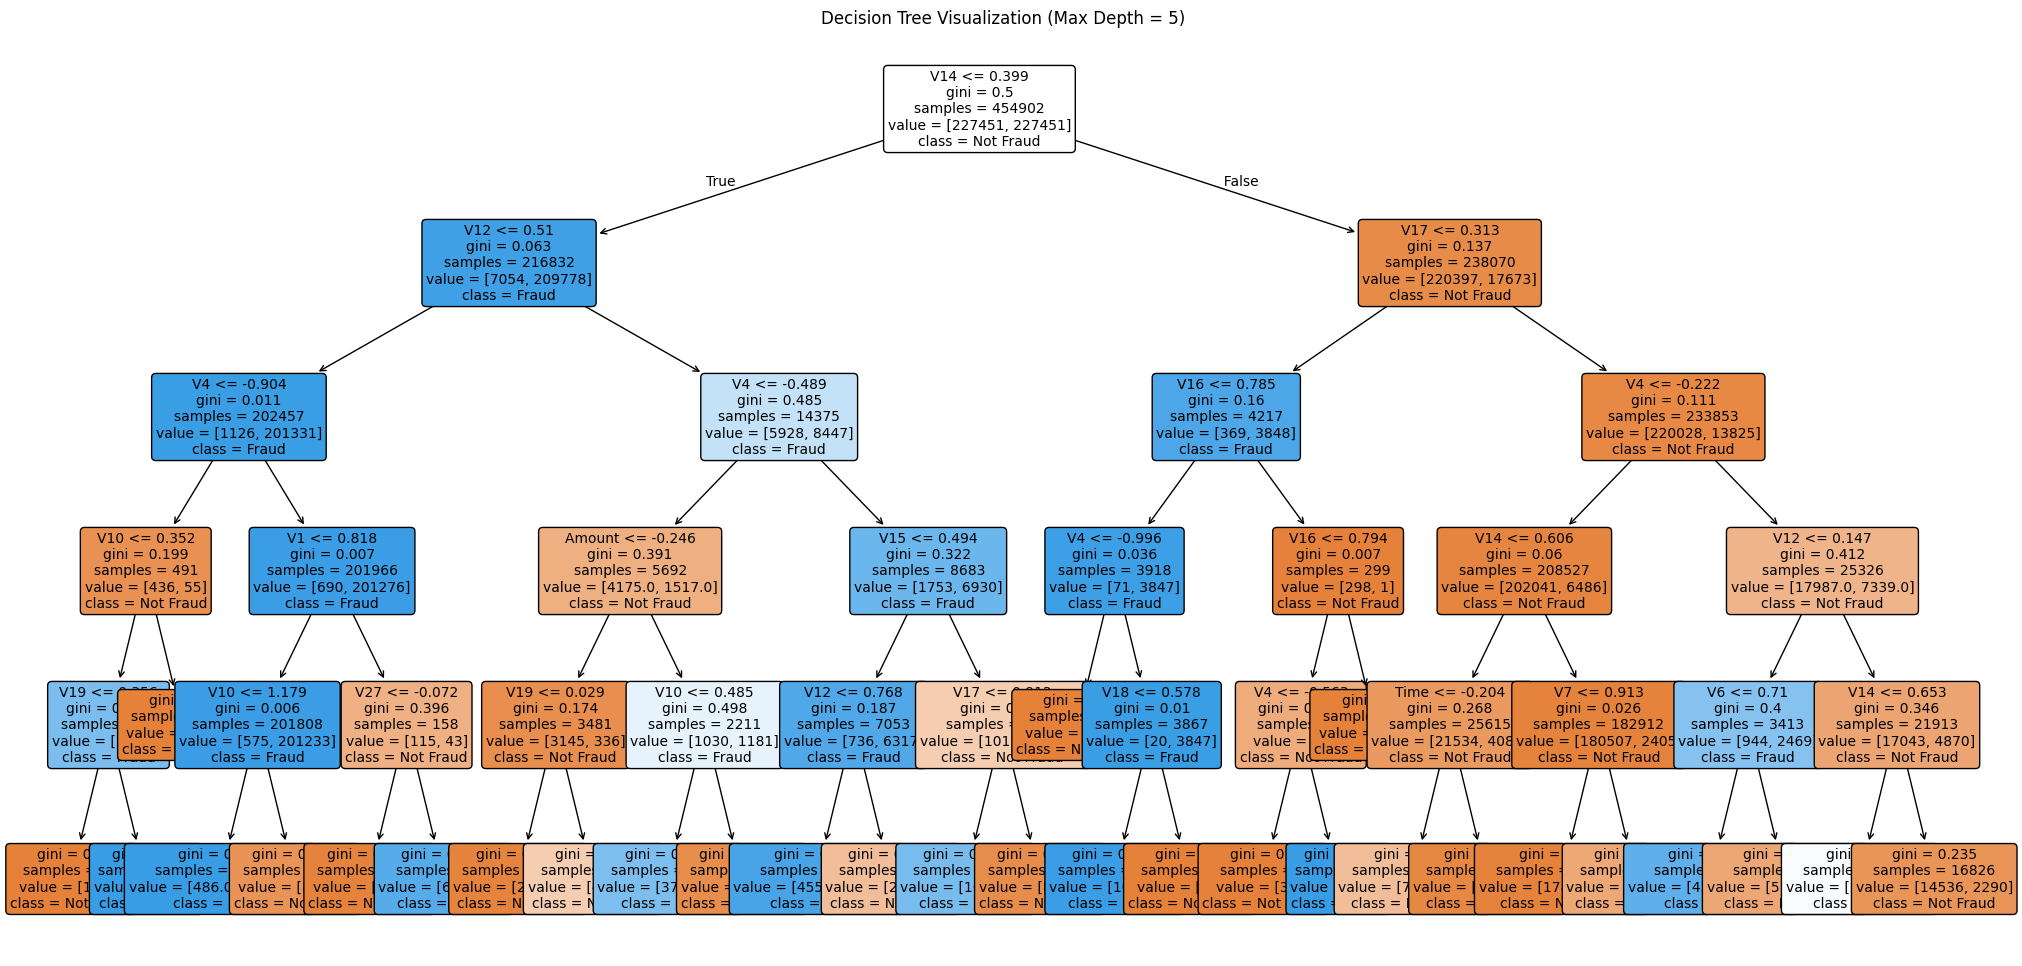

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))  # Set a large figure size for readability
plot_tree(dt,
          filled=True,
          feature_names=x_train.columns,
          class_names=['Not Fraud', 'Fraud'],
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth = 5)")
plt.show()

In [41]:
# decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train_smote, y_train_smote)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9888346617042941
[[56239   625]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



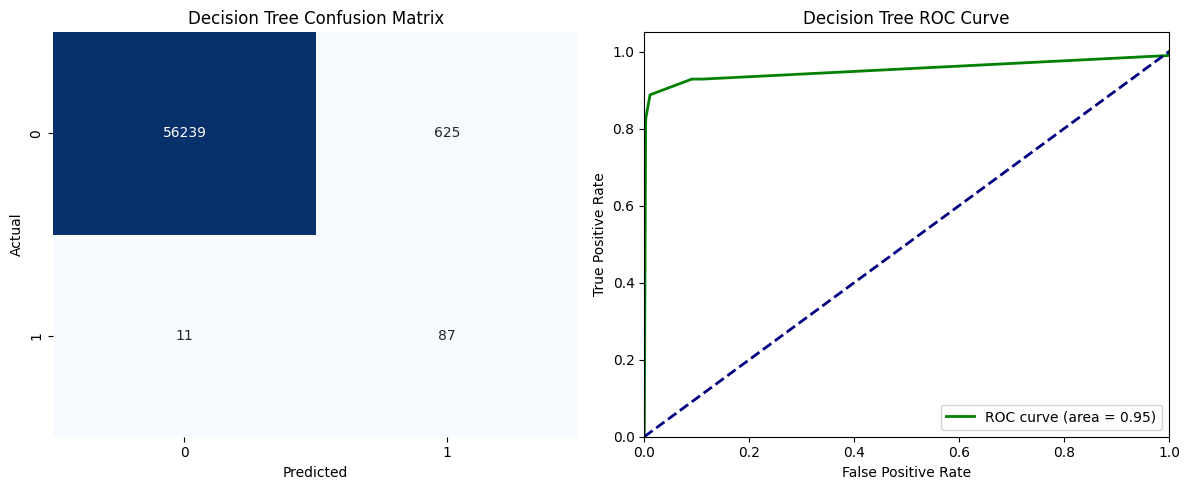

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Predictions
y_pred_dt = dt.predict(x_test)
y_prob_dt = dt.predict_proba(x_test)[:, 1]

# 2. Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.subplot(1, 2, 2)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

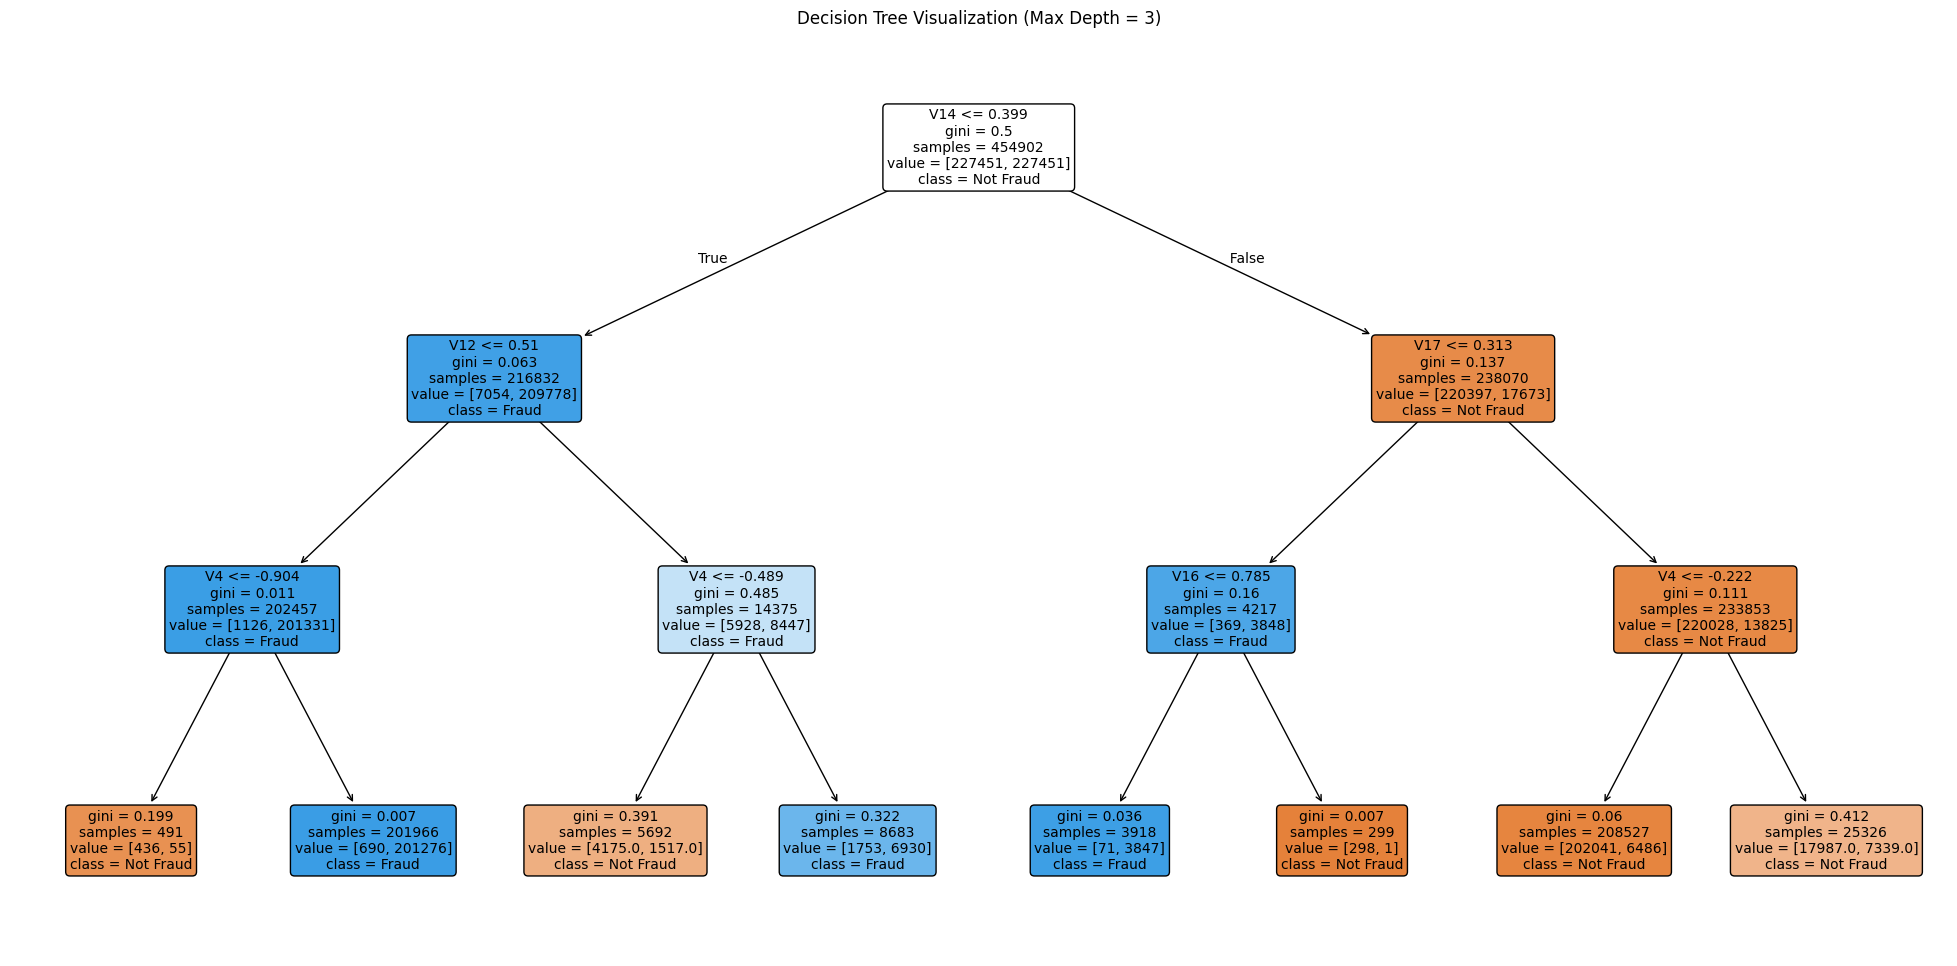

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))  # Set a large figure size for readability
plot_tree(dt,
          filled=True,
          feature_names=x_train.columns,
          class_names=['Not Fraud', 'Fraud'],
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

In [45]:
# decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5 ,criterion='entropy')
dt.fit(x_train_smote, y_train_smote)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9897124398721955
[[56291   573]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.87      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.61     56962
weighted avg       1.00      0.99      0.99     56962



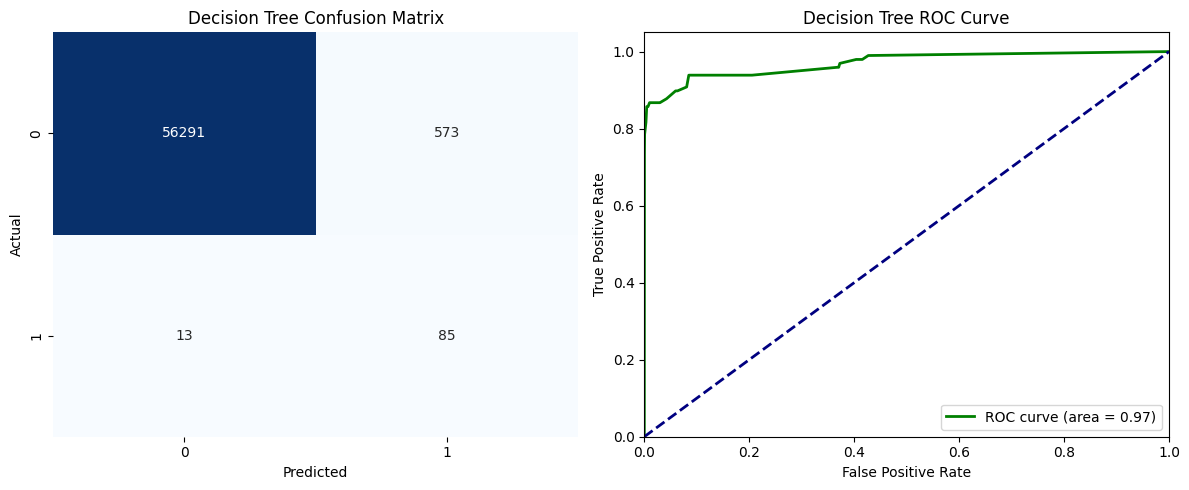

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Predictions
y_pred_dt = dt.predict(x_test)
y_prob_dt = dt.predict_proba(x_test)[:, 1]

# 2. Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.subplot(1, 2, 2)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

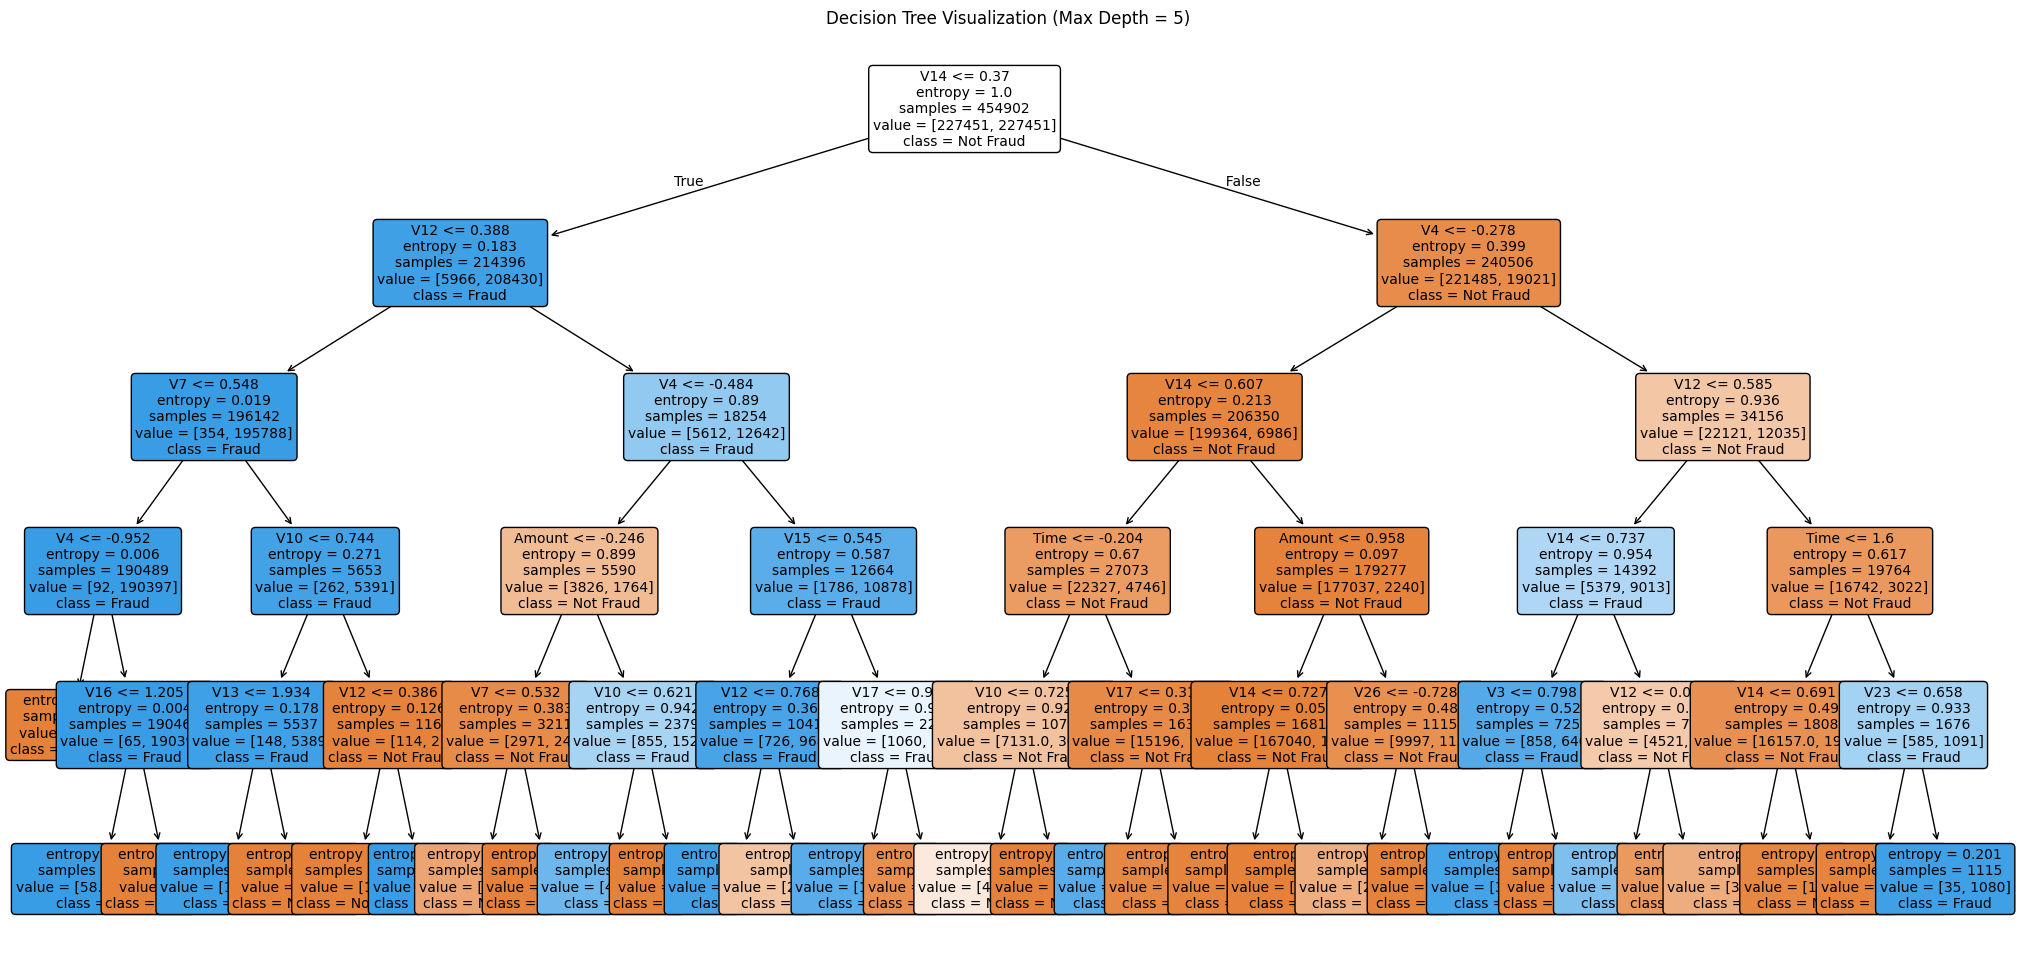

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))  # Set a large figure size for readability
plot_tree(dt,
          filled=True,
          feature_names=x_train.columns,
          class_names=['Not Fraud', 'Fraud'],
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth = 5)")
plt.show()

In [49]:
# decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3 ,criterion='entropy')
dt.fit(x_train_smote, y_train_smote)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9661704294090797
[[54945  1919]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



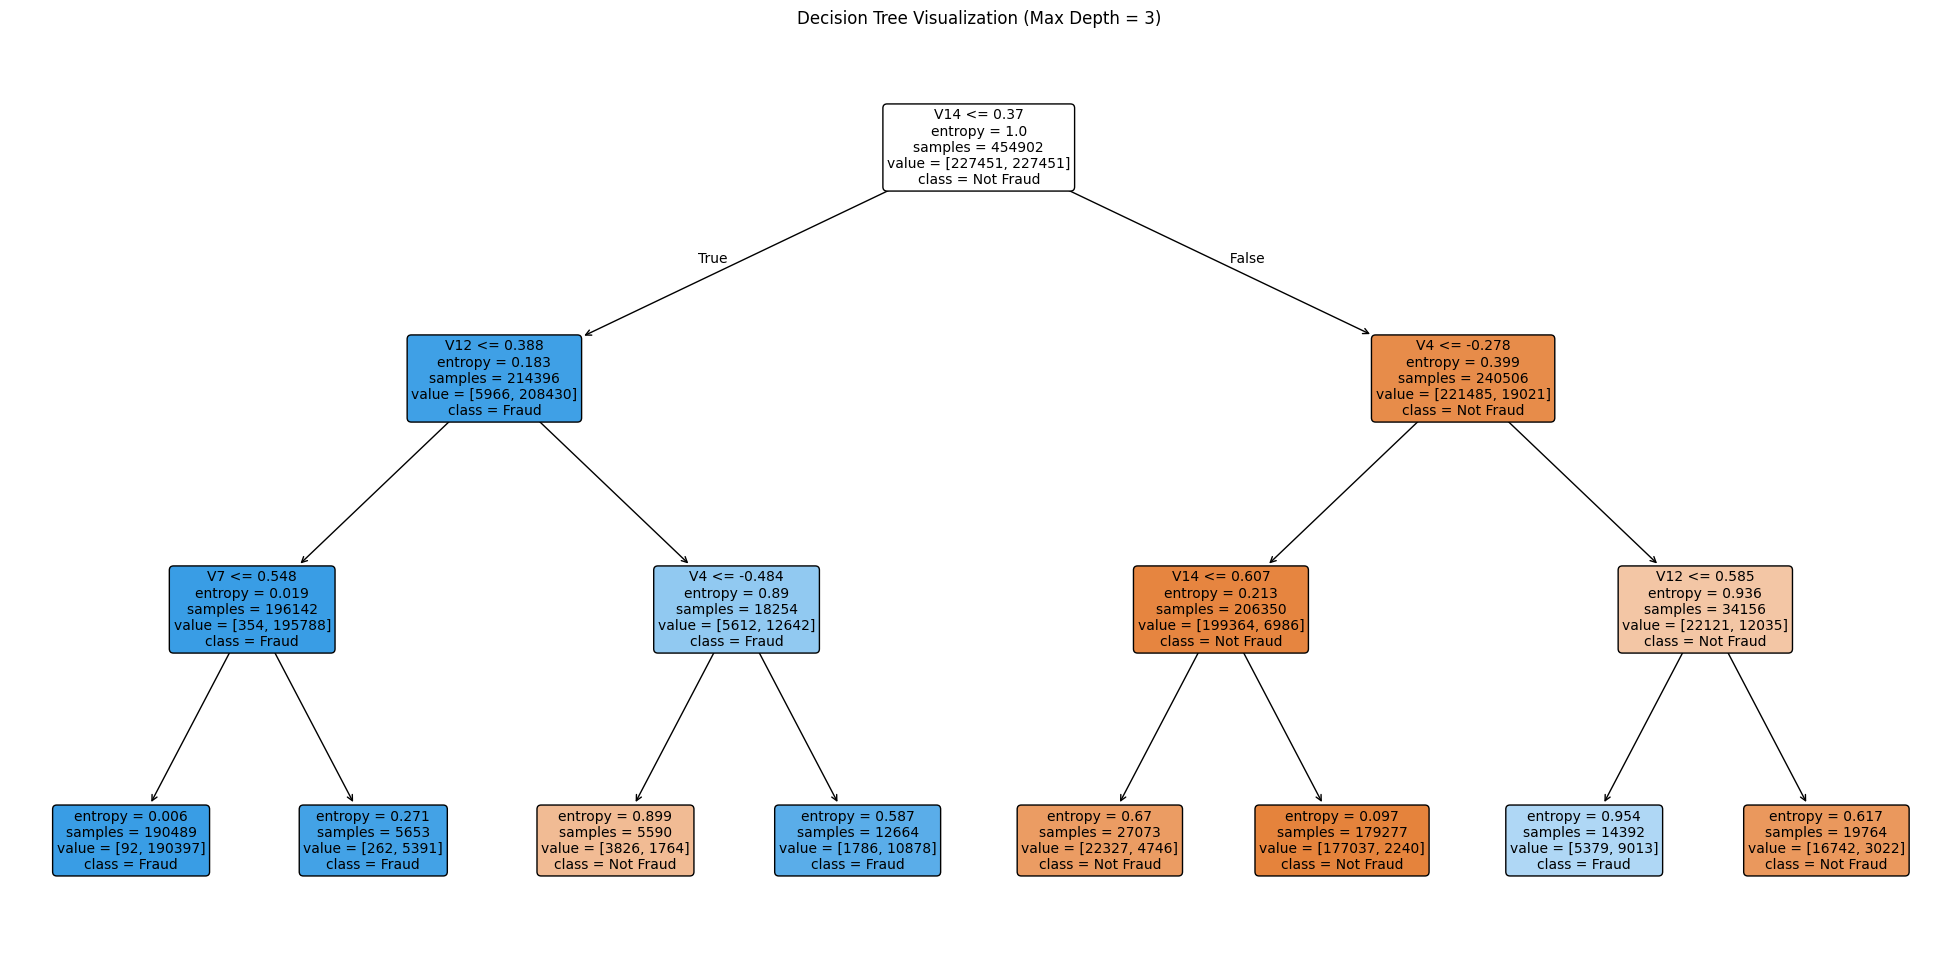

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))  # Set a large figure size for readability
plot_tree(dt,
          filled=True,
          feature_names=x_train.columns,
          class_names=['Not Fraud', 'Fraud'],
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

In [29]:
# svm
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train_smote, y_train_smote)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9914855517713563
[[56389   475]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.90      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962



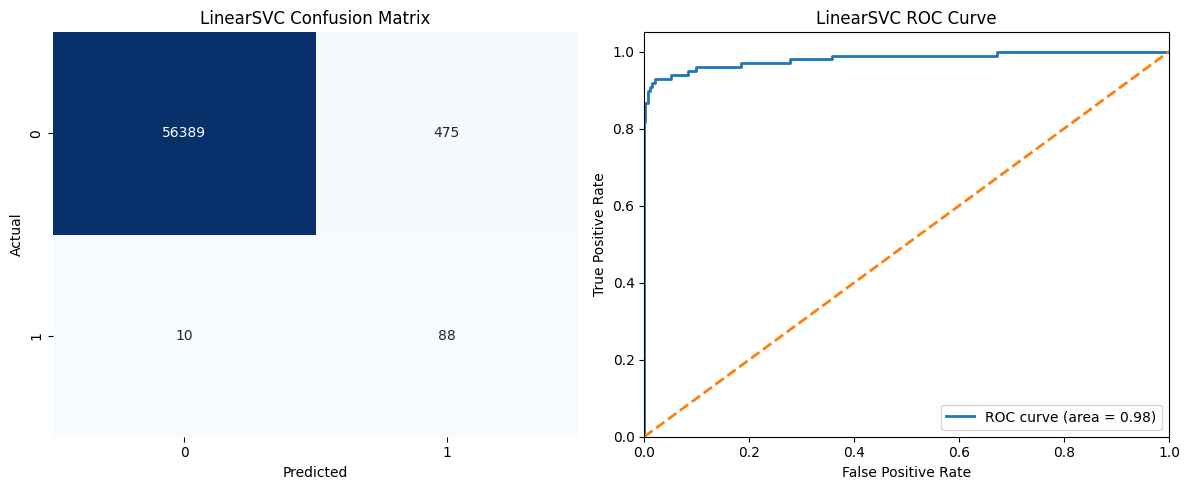

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Predictions
y_pred_svm = svm.predict(x_test)
y_scores_svm = svm.decision_function(x_test)   # LinearSVC uses decision_function()

# 2. Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LinearSVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.subplot(1, 2, 2)
plt.plot(fpr_svm, tpr_svm, lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LinearSVC ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [32]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state = 42)
lr.fit(x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9917137740950107
[[56400   464]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.64     56962
weighted avg       1.00      0.99      0.99     56962



c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


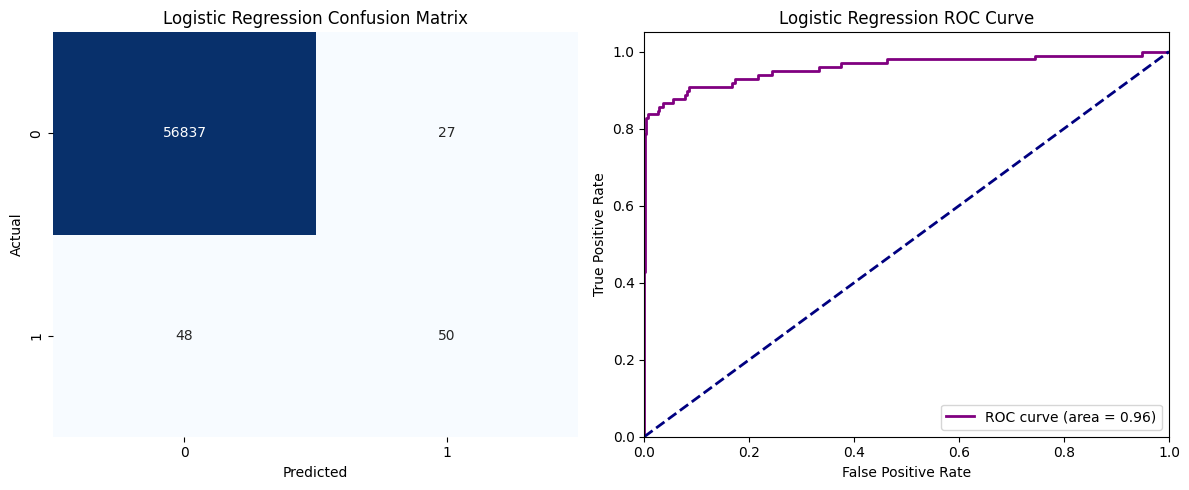

In [34]:

# 1. Prepare Data (Scaling is required for LR)
x_test_scaled = scaler.transform(x_test)

# 2. Predictions
y_pred_lr = lr.predict(x_test_scaled)
y_prob_lr = lr.predict_proba(x_test_scaled)[:, 1]

# 3. Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4. ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.subplot(1, 2, 2)
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [35]:
# # knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote, y_train_smote)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9984375548611355
[[56791    73]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.84      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import roc_curve, auc, confusion_matrix

# # 1. Predictions
# y_pred_knn = knn.predict(x_test)
# y_prob_knn = knn.predict_proba(x_test)[:, 1]

# # 2. Confusion Matrix
# cm_knn = confusion_matrix(y_test, y_pred_knn)
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('KNN Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # 3. ROC Curve
# fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
# roc_auc_knn = auc(fpr_knn, tpr_knn)

# plt.subplot(1, 2, 2)
# plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('KNN ROC Curve')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


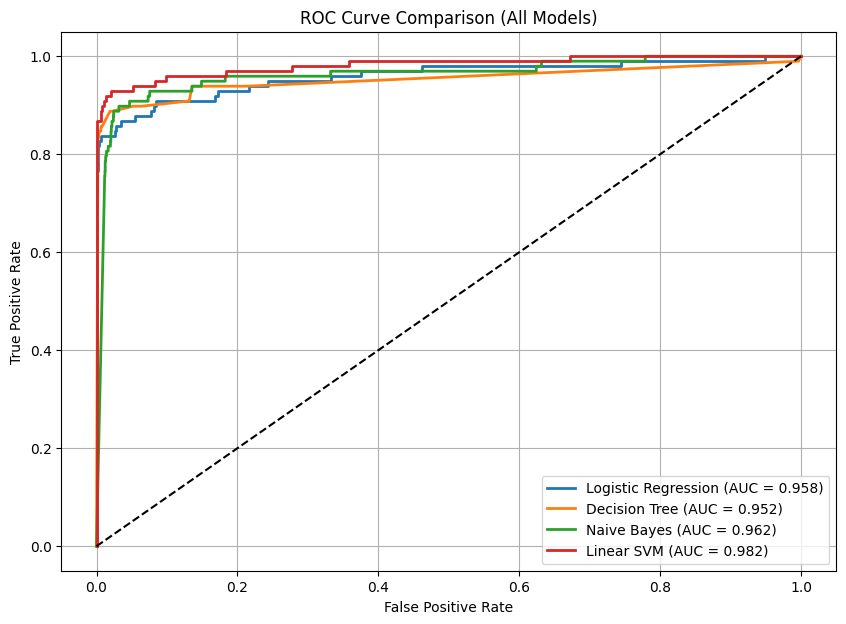

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

# --- Logistic Regression ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# --- Decision Tree ---
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')

# --- Naive Bayes ---
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})')

# # --- KNN ---
# fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
# roc_auc_knn = auc(fpr_knn, tpr_knn)
# plt.plot(fpr_knn, tpr_knn, lw=2, label=f'KNN (AUC = {roc_auc_knn:.3f})')

# --- Linear SVM ---
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, lw=2, label=f'Linear SVM (AUC = {roc_auc_svm:.3f})')

# Diagonal baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (All Models)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Predictions already available:
# y_pred_lr, y_pred_dt, y_pred_nb, y_pred_knn, y_pred_svm

models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Naive Bayes": y_pred_nb,
    # "KNN": y_pred_knn,
    "Linear SVM": y_pred_svm
}

rows = []

for name, preds in models.items():
    rows.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds),
        recall_score(y_test, preds),
        f1_score(y_test, preds)
    ])

df_results = pd.DataFrame(rows, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score"
])

print(df_results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.998683   0.649351  0.510204  0.571429
1        Decision Tree  0.980689   0.073980  0.887755  0.136578
2          Naive Bayes  0.976967   0.061416  0.867347  0.114710
3           Linear SVM  0.991486   0.156306  0.897959  0.266263
